In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import imutils
from tqdm import tqdm
import os
import tensorflow as tf


In [37]:
train_data="D:\\captcha-version-2-images\\samples"
p1="D:\\adaptive"
p2="D:\\otsu"
p3="D:\\gaussian_otsu"
for i in tqdm(os.listdir(train_data)):
    path=os.path.join(train_data,i)
    img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    # Adaptive thresholding
    th = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 17, 2)

    # Otsu thresholding
    ret2, th2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Otsu thresholding with Gaussian Blur
    blur = cv2.GaussianBlur(img, (3, 3), 0)
    ret3, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    #using proper erosion and dilation methods
    
    kernel = np.ones((1,3), np.uint8)
    dilation = cv2.dilate(th, kernel, iterations=1)
    dilation2 = cv2.dilate(th2, kernel, iterations=1)
    dilation3 = cv2.dilate(th3, kernel, iterations=1)

    erosion = cv2.erode(dilation, kernel, iterations=1)
    erosion2 = cv2.erode(dilation2, kernel, iterations=1)
    erosion3 = cv2.erode(dilation3, kernel, iterations=1)

    kernel = np.ones((3,1), np.uint8)
    dilation = cv2.dilate(erosion, kernel, iterations=1)
    dilation2 = cv2.dilate(erosion2, kernel, iterations=1)
    dilation3 = cv2.dilate(erosion3, kernel, iterations=1)
    
    cv2.imwrite(p1+"\\"+i,dilation)
    cv2.imwrite(p2+"\\"+i,dilation2)
    cv2.imwrite(p3+"\\"+i,dilation3)
    

   

100%|█████████████████████████████████████████████████████████████████████████████| 1070/1070 [00:07<00:00, 156.96it/s]


In [38]:
#Get the individual letters.
#adaptive thresholding gives the clearest result
p1="D:\\adaptive"
for i in tqdm(os.listdir(p1)):
    path=os.path.join(p1,i)
    img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    x, y, w, h = 30, 12, 20, 38
    for  j in range(5):
        ch=i[j]
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi=img[y:y+h,x:x+w]
        cv2.imwrite("D:\\individual_letters\\"+i+"_"+ch+".png",roi)
        x += w



100%|█████████████████████████████████████████████████████████████████████████████| 1070/1070 [00:09<00:00, 111.58it/s]


In [39]:
#getting the label for every character

p2="D:\\individual_letters"

all_images=[]
for i in tqdm(os.listdir(p2)):
    path=os.path.join(p2,i)
    img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    img=img/255
    label=i.split('.')[0]      
    label=i.split('_')[1]
    label=label.split('.')[0]  
    print(label)
    all_images.append([np.array(img),label])
    shuffle(all_images)


  0%|                                                                                         | 0/4797 [00:00<?, ?it/s]

2
6
d
m
2
5
d
n
2
3
5
6
g
2
3
d
g
m
2
3
8
n
2
3
4
m
2
4
e
2
4
5
y
2
4
6
f
w
2
4
e
p


  1%|▋                                                                              | 42/4797 [00:00<00:12, 384.09it/s]

w
2
5
7
2
3
5
c
d
2
5
e
g
p
2
5
6
m
p
2
5
m
p
2
3
5
w
2
4
5
6
m
2
6
8
g
2
3
4
8
2
4
7
8
x


  2%|█▍                                                                             | 87/4797 [00:00<00:12, 391.93it/s]

2
7
8
b
2
4
8
b
g
2
c
e
f
g
2
5
8
c
g
2
c
g
x
y
2
7
e
g
n
2
4
e
f
n
2
d
f
g
x
2
3
7
8


  3%|██                                                                            | 130/4797 [00:00<00:11, 392.32it/s]

g
2
7
g
m
n
2
6
b
g
y
2
7
8
g
m
2
m
n
p
2
3
7
f
n
2
5
b
c
n
2


  3%|██▌                                                                           | 161/4797 [00:00<00:13, 354.26it/s]

b
c
n
x
2
6
f
n
2
6
g
n
p
2
3
8
n
x
2
8
p
y
2
f
n
p
2
4
7
w
y
2
3
8


  4%|███▏                                                                          | 195/4797 [00:00<00:13, 345.74it/s]

c
w
2
3
7
w
x
2
7
b
m
x
2
c
n
x
2
8
c
n
y
2
g
y
2
3
5
b
f
2
3
c


  5%|███▋                                                                          | 227/4797 [00:00<00:13, 333.51it/s]

n
2
3
d
n
2
3
b
3
7
f
m
3
7
n
3
4
g
n
3
4
e
p
3
4
8
b
3
4
f
m
x
3
4
c
n


  5%|████▎                                                                         | 263/4797 [00:00<00:13, 337.34it/s]

p
3
5
6
8
y
2
3
6
b
c
3
4
6
n
x
2
3
5
6
w
3
7
b
g
3
7
x
3
5
7
8
e
2
3


  6%|████▊                                                                         | 298/4797 [00:00<00:13, 337.23it/s]

5
7
d
3
6
7
e
p
2
3
7
8
g
3
5
7
8
n
3
4
b
e
w
3
8
b
d
f
3
b
d
f
n
3


  7%|█████▍                                                                        | 332/4797 [00:00<00:13, 334.20it/s]

b
f
n
y
3
6
8
b
x
3
7
c
d
e
3
b
c
p
w
3
7
b
d
3
6
d
e
n
3
d
f
g
m


  8%|█████▉                                                                        | 365/4797 [00:01<00:14, 307.08it/s]

3
b
e
n
3
b
e
p
w
3
7
e
n
y
3
b
d
f
x
2
3
6
g
w
3
d
m
n
x
2
3
4
b
n
3


  8%|██████▌                                                                       | 400/4797 [00:01<00:13, 315.46it/s]

c
f
n
3
7
m
n
x
3
d
n
x
3
d
f
n
3
n
p
w
3
7
n
w
3
4
5
n
y
3
4
n
p
3
6
7
n
p
3


  9%|███████▏                                                                      | 439/4797 [00:01<00:13, 331.37it/s]

4
e
g
p
2
3
b
w
3
d
n
w
2
3
5
x
3
5
f
m
x
3
c
g
x
3
6
g
n
x
2
3
e
y


 10%|███████▋                                                                      | 473/4797 [00:01<00:14, 305.29it/s]

3
d
e
g
y
3
7
f
m
y
2
4
6
8
b
2
4
d
w
2
4
n
x
y
2
4
p
x
y
3
4
e
g
y
3
4
5
m
n


 11%|████████▎                                                                     | 512/4797 [00:01<00:13, 323.43it/s]

3
4
5
d
p
3
4
e
f
x
3
4
m
4
5
c
2
4
c
4
b
f
y
4
8
e
x
4
e
p
y
4
5
6
7


 11%|████████▉                                                                     | 547/4797 [00:01<00:12, 327.38it/s]

d
4
6
b
m
3
4
7
p
4
7
f
4
7
8
n
x
4
7
e
p
2
4
7
b
m
4
8
d
e
2
4
b
p


 12%|█████████▍                                                                    | 581/4797 [00:01<00:13, 302.91it/s]

w
4
8
c
n
4
8
c
f
w
4
7
b
c
n
2
4
d
m
4
7
d
f
g
3
4
d
w
4
e
g
m
4
e
n
x


 13%|██████████                                                                    | 617/4797 [00:01<00:13, 311.55it/s]

4
8
f
p
y
3
4
6
c
f
4
5
f
g
p
3
4
b
f
g
4
b
c
g
y
2
4
5
m
w
2
4
g
n
y
3
4
m


 14%|██████████▋                                                                   | 655/4797 [00:01<00:12, 326.08it/s]

n
3
4
7
c
n
3
4
f
n
4
6
m
w
4
6
7
g
w
4
5
8
c
y
4
c
e
x
y
3
4
f
n
y


 14%|███████████▏                                                                  | 689/4797 [00:02<00:12, 326.46it/s]

2
4
5
7
2
3
5
m
3
5
7
f
n
3
5
8
m
n
3
5
8
b
w
3
5
p
w
5
6
d
w
5
c
w


 15%|███████████▊                                                                  | 723/4797 [00:02<00:12, 319.37it/s]

2
5
m
y
3
4
5
6
c
5
6
m
y
5
6
c
n
x
3
5
7
b
n
3
5
7
8
d
4
5
7
d
2
5
7
b
5
7


 16%|████████████▎                                                                 | 761/4797 [00:02<00:12, 332.03it/s]

g
n
x
5
7
d
p
w
5
8
b
m
5
8
n
p
5
6
b
5
8
b
f
g
2
5
b
g
p
5
7
b
d
n
5
d
m


 17%|████████████▉                                                                 | 798/4797 [00:02<00:11, 338.94it/s]

n
x
3
5
e
n
p
5
e
p
x
3
5
f
g
5
e
f
m
y
5
e
g
3
5
c
d
g
5
7
c
m
y
5
7


 17%|█████████████▌                                                                | 833/4797 [00:02<00:12, 326.98it/s]

c
f
m
5
f
m
4
5
g
m
n
5
d
m
n
p
2
4
5
n
3
4
5
n
w
2
5
7
8
n
2
3
5
7


 18%|██████████████                                                                | 867/4797 [00:02<00:12, 327.10it/s]

n
5
6
e
g
n
5
g
n
5
6
d
m
n
5
f
n
4
5
m
n
p
5
d
n
p
5
n
x
3
5
m
p
5
8
f
m
p
5


 19%|██████████████▋                                                               | 906/4797 [00:02<00:11, 340.26it/s]

6
b
m
p
5
d
w
5
n
x
5
7
x
2
5
d
e
x
5
c
g
w
x
5
f
w
y
5
g
p
x
y
2
6
f
g


 20%|███████████████▎                                                              | 942/4797 [00:02<00:11, 342.14it/s]

n
2
3
6
b
n
2
3
4
6
8
3
6
e
p
x
4
6
8
x
3
4
6
b
p
2
4
6
8
m
5
6
8
e
x


 20%|███████████████▉                                                              | 977/4797 [00:02<00:11, 329.07it/s]

5
6
b
e
m
5
6
8
m
5
6
m
n
w
2
6
b
w
4
6
d
n
4
6
f
n
5
6
p
w
3
5
6
7


 21%|████████████████▏                                                            | 1011/4797 [00:03<00:11, 321.12it/s]

p
3
6
7
g
3
6
7
8
w
6
7
d
e
y
2
5
6
8
y
6
8
d
f
w
4
6
8
x
4
6
b
g
4
6
b
w


 22%|████████████████▊                                                            | 1048/4797 [00:03<00:11, 330.90it/s]

5
6
b
d
n
6
b
m
n
6
b
g
w
x
3
6
c
n
3
5
6
c
p
6
c
m
6
c
e
w
x
2
6
d


 23%|█████████████████▎                                                           | 1082/4797 [00:03<00:11, 315.18it/s]

y
6
7
d
m
x
2
6
d
e
g
4
5
6
e
6
e
n
p
6
b
c
e
n
3
6
d
e
n
2
6
c
f
y
5
6
7
8


 23%|█████████████████▉                                                           | 1120/4797 [00:03<00:11, 328.85it/s]

f
6
8
c
f
g
6
d
f
g
w
4
6
8
f
n
4
5
6
g
w
3
6
e
g
p
3
6
g
m
n
5
6
e


 24%|██████████████████▌                                                          | 1154/4797 [00:03<00:11, 324.64it/s]

g
m
6
e
g
m
6
8
m
n
6
b
g
m
y
3
4
6
n
5
6
d
f
n
6
g
n
6
g
n
6
g
n
w
2


 25%|███████████████████                                                          | 1189/4797 [00:03<00:10, 328.25it/s]

6
e
g
p
6
7
g
p
x
4
6
f
p
y
6
c
n
p
w
6
7
b
w
4
6
g
n
w
6
c
n
w
y
4


 25%|███████████████████▋                                                         | 1223/4797 [00:03<00:11, 306.71it/s]

6
e
n
x
6
e
m
p
x
6
d
x
6
d
p
y
2
7
8
n
2
6
7
f
m
3
7
m
n
x
3
4
5
7
8


 26%|████████████████████▏                                                        | 1258/4797 [00:03<00:11, 315.20it/s]

4
7
e
g
y
5
7
f
p
w
3
4
6
7
y
3
5
6
7
6
7
n
p
6
7
n
x
6
7
f
y
3
7
8
6


 27%|████████████████████▊                                                        | 1293/4797 [00:03<00:10, 321.44it/s]

7
g
n
4
7
p
w
4
5
7
8
n
6
7
8
d
w
7
8
c
e
4
7
b
m
7
b
2
7
b
m
w
7


 28%|█████████████████████▎                                                       | 1326/4797 [00:04<00:11, 309.52it/s]

c
d
e
g
7
c
g
m
y
4
7
d
m
2
7
c
d
g
4
7
d
w
x
7
b
d
x
7
d
w
y
2
7
e
y
3
7


 28%|█████████████████████▉                                                       | 1363/4797 [00:04<00:10, 322.19it/s]

8
b
f
7
d
e
f
7
c
f
m
y
3
7
f
g
n
6
7
c
e
g
3
7
f
g
m
7
e
g
n
4
7
g
p
7
8
m
p


 29%|██████████████████████▌                                                      | 1402/4797 [00:04<00:10, 336.53it/s]

x
7
f
g
m
7
n
x
2
5
7
8
p
7
c
d
p
5
7
g
n
p
6
7
m
w
4
7
n
w
7
m
n
p
w


 30%|███████████████████████                                                      | 1437/4797 [00:04<00:10, 325.41it/s]

4
7
p
w
y
7
c
d
x
y
5
7
d
m
x
2
4
7
x
y
2
6
7
f
y
2
3
8
p
2
8
f
x
2
3
8
f
4


 31%|███████████████████████▋                                                     | 1475/4797 [00:04<00:09, 336.58it/s]

8
p
y
4
7
8
w
x
2
5
6
8
5
8
d
n
x
5
8
e
p
w
5
6
8
m
w
4
6
8
m
4
7
8
c


 31%|████████████████████████▏                                                    | 1510/4797 [00:04<00:09, 332.86it/s]

d
7
8
m
n
y
8
b
g
x
2
5
8
y
3
5
7
8
b
4
8
b
m
8
b
w
2
3
8
c
f
2
8
c
w
y
8
c


 32%|████████████████████████▊                                                    | 1548/4797 [00:04<00:09, 342.12it/s]

4
6
8
c
m
2
8
d
n
4
8
d
m
w
8
d
e
p
6
7
8
b
d
2
3
8
e
m
8
e
g
8
e
f
n


 33%|█████████████████████████▍                                                   | 1583/4797 [00:04<00:09, 321.80it/s]

x
4
8
g
p
y
8
c
e
g
m
7
8
f
g
n
4
8
c
g
m
8
g
m
n
x
2
8
g
n
p
3
4
8


 34%|█████████████████████████▉                                                   | 1617/4797 [00:04<00:09, 323.45it/s]

n
4
8
n
5
6
8
m
n
3
5
8
n
p
5
8
n
p
2
6
8
n
5
6
8
n
8
b
e
n
w
4
8


 34%|██████████████████████████▍                                                  | 1650/4797 [00:05<00:10, 303.96it/s]

e
g
n
3
7
8
n
2
8
n
p
5
8
d
n
p
3
8
e
n
p
8
f
p
x
4
5
7
8
w
5
7


 35%|██████████████████████████▉                                                  | 1682/4797 [00:05<00:10, 305.18it/s]

8
w
7
8
d
w
y
7
8
e
f
x
3
6
8
f
y
3
6
8
b
y
8
d
n
p
y
2
6
b
d
n
2
8
b
g
2
8
b
e


 36%|███████████████████████████▋                                                 | 1722/4797 [00:05<00:09, 325.46it/s]

g
2
b
e
n
3
5
6
b
f
3
b
n
p
x
3
4
b
n
w
4
7
b
c
d
4
b
c
n
4
b
d
n
4
5
b
x
y
5


 37%|████████████████████████████▎                                                | 1761/4797 [00:05<00:08, 339.01it/s]

6
b
d
4
5
b
d
n
5
7
b
f
m
5
b
m
n
5
b
n
p
5
6
8
b
n
2
6
b
f
p
4
8
b
c
x
b


 37%|████████████████████████████▊                                                | 1798/4797 [00:05<00:08, 344.00it/s]

m
y
8
b
c
f
n
b
c
n
w
3
7
b
d
3
b
d
4
8
b
d
g
3
b
e
p
6
b
e
n
p
b
d
e


 38%|█████████████████████████████▍                                               | 1833/4797 [00:05<00:09, 326.58it/s]

f
2
5
b
c
f
4
8
b
g
4
b
d
g
m
5
b
e
g
m
b
c
d
g
x
3
8
b
m
p
b
e
m
p


 39%|█████████████████████████████▉                                               | 1867/4797 [00:05<00:11, 260.73it/s]

x
5
b
m
n
w
2
b
c
f
n
5
b
c
f
n
2
3
b
n
y
4
b
n
w
y
2
4
b


 40%|██████████████████████████████▍                                              | 1896/4797 [00:05<00:11, 257.53it/s]

d
p
6
b
m
p
w
7
b
d
p
w
4
b
w
5
b
f
n
w
5
b
m
w
y
6
b
n


 40%|██████████████████████████████▉                                              | 1924/4797 [00:05<00:11, 252.57it/s]

w
b
e
m
w
5
b
d
e
x
b
c
f
x
3
5
b
y
2
8
b
c
y
b
f
g
n


 41%|███████████████████████████████▎                                             | 1951/4797 [00:06<00:11, 246.38it/s]

y
2
7
b
c
f
2
4
c
d
g
2
6
c
g
p
2
8
c
n
y
3
5
c
e
2


 41%|███████████████████████████████▋                                             | 1977/4797 [00:06<00:11, 244.76it/s]

3
5
7
c
3
8
c
n
x
3
4
b
c
2
4
5
7
c
2
4
8
b
c
4
b
c


 42%|████████████████████████████████▏                                            | 2003/4797 [00:06<00:11, 233.17it/s]

d
g
4
b
c
n
y
4
c
m
5
6
c
5
c
e
n
x
4
5
6
7
c
6
8


 42%|████████████████████████████████▌                                            | 2028/4797 [00:06<00:11, 235.37it/s]

c
f
g
6
c
e
w
3
5
7
c
e
3
7
b
c
g
7
8
c
n
6
8
c
d
m
8
c
f
x
y
8
c


 43%|█████████████████████████████████                                            | 2061/4797 [00:06<00:10, 255.22it/s]

n
8
b
c
f
4
5
8
c
2
c
f
w
2
c
n
x
4
c
d
e
g
4
6
c
d
p
3
b
c
d
7
c
d
f
c
d
e
f
n


 44%|█████████████████████████████████▋                                           | 2101/4797 [00:06<00:09, 283.96it/s]

8
c
d
m
n
5
c
e
n
c
e
m
n
w
2
c
f
y
5
6
c
f
4
c
f
p
3
5
c
f
n
6
8
c
f
p
6


 45%|██████████████████████████████████▎                                          | 2138/4797 [00:06<00:08, 302.36it/s]

c
e
f
w
5
c
d
g
b
c
g
6
b
c
m
y
c
d
m
n
4
c
e
n
x
c
m
n
c
n
w
y


 45%|██████████████████████████████████▊                                          | 2170/4797 [00:06<00:08, 297.29it/s]

8
c
p
3
6
c
e
p
c
d
n
w
x
c
g
w
x
y
c
m
n
w
y
3
c
g
w
x
3
c
n
w
y
2


 46%|███████████████████████████████████▍                                         | 2204/4797 [00:06<00:08, 305.72it/s]

b
d
2
7
d
n
2
5
d
y
2
3
6
d
n
2
8
d
n
x
2
b
d
n
2
c
d
w
y
3
7
8
d
n
3
7
c


 47%|███████████████████████████████████▉                                         | 2241/4797 [00:07<00:08, 319.30it/s]

d
y
3
8
c
d
y
3
c
d
n
y
2
4
8
d
n
4
d
p
y
6
d
m
6
c
d
n
6
c
d
f
n
5
7
b


 47%|████████████████████████████████████▌                                        | 2277/4797 [00:07<00:07, 327.03it/s]

d
5
7
c
d
x
3
7
d
e
n
3
7
d
n
8
c
d
e
8
c
d
n
x
3
b
d
e
x
b
d
e
f
n


 48%|█████████████████████████████████████                                        | 2311/4797 [00:07<00:07, 323.40it/s]

3
b
d
n
y
b
c
d
p
3
4
6
c
d
8
c
d
e
y
8
c
d
n
p
5
d
w
4
6
7
d
c
d
c


 49%|█████████████████████████████████████▋                                       | 2345/4797 [00:07<00:07, 324.58it/s]

d
e
n
d
g
m
y
d
f
n
p
b
d
p
y
d
p
x
4
5
d
e
x
7
8
d
e
f
5
d
e
p
d
e
f
x
y


 50%|██████████████████████████████████████▏                                      | 2382/4797 [00:07<00:07, 333.47it/s]

b
d
e
n
4
d
f
n
x
4
c
d
g
m
8
d
m
n
w
8
d
m
p
x
8
d
m
p
x
2
6
d
n
2


 50%|██████████████████████████████████████▊                                      | 2416/4797 [00:07<00:07, 324.04it/s]

d
m
n
y
5
d
f
n
8
d
m
n
7
d
e
n
d
n
p
x
b
d
p
y
3
d
n
w
6
d
m
n
w


 51%|███████████████████████████████████████▎                                     | 2449/4797 [00:07<00:07, 322.12it/s]

3
8
d
w
c
d
w
x
3
c
d
x
y
7
d
n
p
y
c
d
n
x
y
2
5
e
g
x
2
6
d
e
2


 52%|███████████████████████████████████████▊                                     | 2482/4797 [00:07<00:07, 320.79it/s]

e
g
m
3
c
e
f
3
d
e
n
3
4
e
m
y
4
6
d
e
p
4
6
e
w
y
4
7
d
e
g
5
6
e
n


 52%|████████████████████████████████████████▍                                    | 2517/4797 [00:07<00:07, 325.49it/s]

6
7
e
x
6
7
b
e
y
6
e
m
p
2
7
c
d
e
4
6
7
e
n
4
7
e
n
x
4
5
7
e
x


 53%|████████████████████████████████████████▉                                    | 2550/4797 [00:08<00:07, 292.25it/s]

2
4
8
e
n
8
d
e
n
x
5
8
e
b
c
e
x
6
c
e
m
p
4
c
d
e
w
3
d
e
g
p
d
e
n
w
y
8


 54%|█████████████████████████████████████████▌                                   | 2588/4797 [00:08<00:07, 311.03it/s]

e
f
g
2
3
e
n
4
e
f
m
n
4
e
f
n
p
3
b
e
f
2
6
e
f
2
7
e
f
g
5
e
f
g
x


 55%|██████████████████████████████████████████                                   | 2623/4797 [00:08<00:06, 318.39it/s]

3
4
e
f
x
e
g
m
p
x
e
m
n
p
w
2
3
e
n
4
e
n
3
5
e
g
n
7
e
n
e
m
n
2
e
n
p


 55%|██████████████████████████████████████████▋                                  | 2660/4797 [00:08<00:06, 315.43it/s]

w
5
8
e
p
x
3
e
g
p
5
c
e
f
w
8
e
n
w
x
7
e
g
w
y
c
e
m
n
x
c
e
n
x
y


 56%|███████████████████████████████████████████▎                                 | 2695/4797 [00:08<00:06, 321.60it/s]

2
8
f
n
2
b
f
n
2
e
f
g
2
8
f
m
n
3
5
f
p
x
3
4
6
f
x
2
4
f
n
4
f
n
w
2
5
c
f


 57%|███████████████████████████████████████████▉                                 | 2734/4797 [00:08<00:06, 336.07it/s]

m
5
e
f
6
b
f
p
w
5
6
e
f
n
6
8
f
w
3
4
7
f
x
3
5
7
f
5
7
c
f
x
7
c
e
f
y


 58%|████████████████████████████████████████████▍                                | 2771/4797 [00:08<00:06, 334.47it/s]

3
8
f
n
p
5
8
f
x
3
5
8
f
y
8
f
g
2
b
c
f
p
2
c
f
6
b
c
f
x
3
c
e
f


 58%|█████████████████████████████████████████████                                | 2805/4797 [00:08<00:06, 324.70it/s]

y
c
e
f
m
6
c
e
f
n
d
f
g
p
8
c
e
f
y
6
d
f
p
f
n
x
f
p
x
3
8
b
f
g
7
f


 59%|█████████████████████████████████████████████▌                               | 2841/4797 [00:08<00:05, 330.98it/s]

g
m
4
8
f
g
n
3
6
b
f
g
b
f
n
w
b
c
f
n
2
3
8
f
p
3
f
p
w
y
5
f
n
p
w
2
6


 60%|██████████████████████████████████████████████▏                              | 2878/4797 [00:09<00:05, 338.18it/s]

7
f
p
6
7
f
p
w
2
3
b
f
w
d
f
p
w
x
3
f
p
w
x
2
d
f
n
y
b
f
n
y
8
b
f


 61%|██████████████████████████████████████████████▊                              | 2913/4797 [00:09<00:05, 326.49it/s]

w
y
2
4
7
g
w
2
5
7
g
2
f
g
n
w
3
6
d
g
y
3
e
g
x
4
5
b
g
6
7
g
n
x
7
8
g
n
7


 62%|███████████████████████████████████████████████▍                             | 2952/4797 [00:09<00:05, 339.79it/s]

c
f
g
m
7
f
g
n
7
g
w
x
2
4
8
c
g
8
g
x
8
d
g
n
b
g
x
y
2
7
c
g
2
c
d
g
w


 62%|███████████████████████████████████████████████▉                             | 2989/4797 [00:09<00:05, 344.57it/s]

3
8
b
c
g
c
f
g
p
6
c
f
g
x
4
d
f
g
m
8
b
d
f
g
3
d
g
n
c
e
f
g
m
4
e
g
w
e


 63%|████████████████████████████████████████████████▌                            | 3027/4797 [00:09<00:05, 335.84it/s]

f
g
w
y
5
e
g
n
y
2
4
f
g
6
b
f
g
x
4
5
f
g
p
c
f
g
x
7
d
g
m
2
c
g


 64%|█████████████████████████████████████████████████▏                           | 3061/4797 [00:09<00:05, 333.25it/s]

m
6
g
m
n
7
8
g
m
n
e
g
m
n
2
3
d
g
n
2
g
n
x
y
b
d
e
g
n
4
b
g
n
3


 65%|█████████████████████████████████████████████████▋                           | 3095/4797 [00:09<00:05, 331.46it/s]

c
g
n
5
8
f
g
n
6
e
g
n
6
b
g
n
y
2
g
p
x
5
7
c
g
p
g
n
p
x
g
n
p
x


 65%|██████████████████████████████████████████████████▏                          | 3129/4797 [00:09<00:05, 319.07it/s]

4
6
8
g
w
3
5
g
m
w
3
5
g
n
w
6
g
m
n
w
2
g
p
x
f
g
p
x
3
4
g
y
5


 66%|██████████████████████████████████████████████████▊                          | 3162/4797 [00:09<00:05, 315.03it/s]

b
f
g
y
8
b
g
x
y
g
m
n
y
2
3
e
m
2
3
b
m
p
2
5
6
7
m
2
4
f
m
n
3
5


 67%|███████████████████████████████████████████████████▎                         | 3196/4797 [00:10<00:05, 318.63it/s]

8
m
3
5
b
m
p
3
f
m
w
4
8
b
m
4
5
7
d
m
4
8
d
f
m
4
8
g
m
5
e
g
m
2
5
m


 67%|███████████████████████████████████████████████████▉                         | 3232/4797 [00:10<00:04, 326.54it/s]

y
3
6
7
b
m
4
6
m
n
x
4
7
d
m
5
7
b
f
m
8
g
m
x
4
8
m
x
4
b
e
m
n
5
8
b
f
m


 68%|████████████████████████████████████████████████████▍                        | 3270/4797 [00:10<00:04, 337.42it/s]

2
b
m
p
y
3
5
c
m
n
2
8
c
m
w
2
c
m
x
3
4
c
g
m
c
f
m
x
y
3
4
d
m
b


 69%|█████████████████████████████████████████████████████                        | 3304/4797 [00:10<00:04, 334.34it/s]

d
g
m
d
m
n
p
x
7
d
m
p
y
4
e
f
m
n
3
b
f
m
x
3
5
c
f
m
5
g
m
n
b
d
g
m
w


 70%|█████████████████████████████████████████████████████▋                       | 3341/4797 [00:10<00:04, 340.62it/s]

c
e
g
m
3
g
m
n
w
3
m
n
5
c
m
n
6
f
m
2
g
m
3
8
g
m
5
m
n
y
4
5
c
m
n
5
e


 70%|██████████████████████████████████████████████████████▏                      | 3378/4797 [00:10<00:04, 345.16it/s]

f
m
n
7
m
p
w
5
m
p
y
b
f
m
p
x
2
5
m
p
w
6
d
f
m
w
m
p
w
x
8
b
m
x
4


 71%|██████████████████████████████████████████████████████▊                      | 3413/4797 [00:10<00:04, 331.02it/s]

m
n
w
x
m
w
x
y
4
8
e
m
y
3
c
m
y
6
8
e
m
y
2
8
f
m
y
2
5
6
n
y
2
7
b
n
y
2
5


 72%|███████████████████████████████████████████████████████▍                     | 3452/4797 [00:10<00:03, 343.22it/s]

8
c
n
2
g
m
n
3
6
e
n
3
7
n
3
6
b
m
n
3
f
n
3
6
m
n
x
3
4
c
n
x
3
f
g
n


 73%|███████████████████████████████████████████████████████▉                     | 3488/4797 [00:10<00:03, 344.23it/s]

x
4
6
c
n
4
b
m
n
4
c
n
p
y
4
n
w
4
5
n
x
5
7
c
m
n
5
8
b
n
5
g
n
w
5


 73%|████████████████████████████████████████████████████████▌                    | 3523/4797 [00:10<00:03, 330.42it/s]

b
g
n
w
2
5
n
x
4
6
b
f
n
2
6
n
5
6
c
n
x
7
b
d
n
y
7
b
e
n
x
7
e
n
2


 74%|█████████████████████████████████████████████████████████                    | 3558/4797 [00:11<00:03, 332.36it/s]

7
f
n
4
7
f
g
n
7
b
e
m
n
6
8
f
n
p
8
e
f
n
p
8
m
n
w
x
8
d
n
y
2
6
7
b


 75%|█████████████████████████████████████████████████████████▋                   | 3594/4797 [00:11<00:03, 336.51it/s]

n
4
5
b
d
n
b
c
g
n
8
b
f
m
n
5
b
f
n
x
7
b
m
n
x
3
b
e
n
p
b
n
w
b
n
p
w


 76%|██████████████████████████████████████████████████████████▎                  | 3631/4797 [00:11<00:03, 342.20it/s]

4
c
g
n
y
b
c
f
g
n
4
c
g
n
w
7
c
n
w
8
c
n
x
y
5
d
g
n
w
c
d
e
n
2
b


 76%|██████████████████████████████████████████████████████████▊                  | 3666/4797 [00:11<00:03, 340.62it/s]

d
g
n
7
d
e
m
n
d
e
f
n
y
2
3
5
e
n
c
d
e
n
e
g
n
2
8
f
n
7
b
f
n
8
b
f
n


 77%|███████████████████████████████████████████████████████████▍                 | 3703/4797 [00:11<00:03, 341.35it/s]

8
b
f
g
n
5
b
c
f
n
c
f
n
w
y
8
d
f
g
n
2
3
f
g
n
d
f
n
w
2
g
n
w
4
6
g


 78%|████████████████████████████████████████████████████████████                 | 3739/4797 [00:11<00:03, 342.91it/s]

m
n
6
g
n
p
y
5
6
7
g
n
2
6
g
n
2
4
8
m
n
4
6
m
n
4
6
m
n
w
2
m
n
x
y


 79%|████████████████████████████████████████████████████████████▌                | 3774/4797 [00:11<00:03, 337.17it/s]

4
n
w
x
6
g
m
n
6
n
w
8
b
f
n
3
f
n
x
c
g
n
x
5
7
n
5
n
p
4
e
n
p
5


 79%|█████████████████████████████████████████████████████████████                | 3808/4797 [00:11<00:02, 334.17it/s]

e
n
y
7
b
n
p
x
2
5
b
n
w
d
e
f
n
w
2
g
m
n
w
c
n
w
3
8
c
n
x
c
m
n
x
2
c
f
n
x


 80%|█████████████████████████████████████████████████████████████▊               | 3848/4797 [00:11<00:02, 347.98it/s]

4
f
n
x
2
5
n
x
8
f
n
x
3
d
n
w
y
3
n
y
5
d
n
p
y
8
n
p
y
b
c
n
x
y
2
4


 81%|██████████████████████████████████████████████████████████████▎              | 3884/4797 [00:12<00:02, 332.20it/s]

g
n
p
2
7
d
p
w
2
6
m
n
p
2
7
p
x
2
m
p
y
4
m
n
p
4
d
e
p
5
7
f
n
p
5
g
m
p
5
c


 82%|██████████████████████████████████████████████████████████████▉              | 3924/4797 [00:12<00:02, 346.47it/s]

e
n
p
6
8
m
n
p
7
f
p
y
2
4
8
c
p
8
g
n
p
x
8
f
p
w
b
c
g
p
c
d
e
p
7
c
f
m
p


 83%|███████████████████████████████████████████████████████████████▌             | 3963/4797 [00:12<00:02, 354.71it/s]

c
m
p
6
c
g
p
4
c
d
p
3
8
d
p
w
8
c
d
p
y
4
e
n
p
x
4
b
f
n
p
5
f
g
n
p


 83%|████████████████████████████████████████████████████████████████▏            | 3999/4797 [00:12<00:02, 348.16it/s]

2
g
m
p
2
g
p
x
y
4
b
f
g
p
3
g
n
p
2
e
g
m
p
2
g
m
n
p
g
n
p
w
3
6
m
p


 84%|████████████████████████████████████████████████████████████████▊            | 4035/4797 [00:12<00:02, 339.83it/s]

4
7
f
m
p
3
d
m
p
w
6
8
e
m
p
5
f
m
p
w
5
g
m
p
7
n
p
f
m
n
p
x
n
p
w


 85%|█████████████████████████████████████████████████████████████████▎           | 4070/4797 [00:12<00:02, 338.97it/s]

y
4
5
6
p
7
8
n
p
d
p
w
y
7
p
x
5
c
n
p
w
b
e
m
p
w
b
m
n
p
w
5
e
n
p
w
2
p


 86%|█████████████████████████████████████████████████████████████████▉           | 4108/4797 [00:12<00:01, 346.62it/s]

x
8
n
p
x
d
p
w
x
8
e
n
p
x
b
e
p
y
b
e
f
p
y
5
6
f
p
y
7
m
p
y
2
7
8


 86%|██████████████████████████████████████████████████████████████████▌          | 4143/4797 [00:12<00:01, 335.77it/s]

e
w
2
7
e
n
w
2
7
p
w
y
4
6
e
p
w
4
8
c
w
4
c
d
w
4
c
n
w
4
f
n
w
x
2
4
m
w


 87%|███████████████████████████████████████████████████████████████████          | 4181/4797 [00:12<00:01, 344.27it/s]

x
2
5
f
n
w
4
6
n
w
y
6
p
w
x
y
6
e
n
w
y
5
7
8
w
6
7
e
m
w
8
b
n
w
x
3
6
8


 88%|███████████████████████████████████████████████████████████████████▋         | 4219/4797 [00:12<00:01, 350.48it/s]

f
w
3
b
d
e
w
b
c
n
w
2
b
c
d
w
5
c
e
n
w
2
b
d
g
w
c
d
p
w
8
d
w
c
d
e


 89%|████████████████████████████████████████████████████████████████████▎        | 4255/4797 [00:13<00:01, 341.37it/s]

f
w
4
6
8
f
w
5
f
m
w
y
2
5
6
g
w
g
n
p
w
4
7
f
m
w
4
6
7
m
w
m
p
w
m
n


 89%|████████████████████████████████████████████████████████████████████▉        | 4291/4797 [00:13<00:01, 342.93it/s]

w
y
c
e
n
p
w
6
m
n
w
8
c
n
w
x
4
n
w
x
y
2
5
c
w
y
5
8
e
w
y
2
7
e
x
2
c
n


 90%|█████████████████████████████████████████████████████████████████████▍       | 4329/4797 [00:13<00:01, 349.50it/s]

x
3
4
7
n
x
2
3
6
g
x
3
7
b
f
x
3
8
f
n
x
3
b
d
e
x
3
f
w
x
4
n
x
4
5
8
w
x


 91%|██████████████████████████████████████████████████████████████████████       | 4367/4797 [00:13<00:01, 354.26it/s]

4
7
f
g
x
4
5
g
x
4
n
p
x
4
5
f
x
5
n
x
y
5
6
b
m
x
6
b
d
p
x
2
4
7
x
2


 92%|██████████████████████████████████████████████████████████████████████▋      | 4403/4797 [00:13<00:01, 351.93it/s]

4
7
b
x
4
5
7
x
6
7
m
n
x
4
6
7
x
5
7
w
x
8
e
n
x
8
n
p
x
b
c
x
6
b
e
m
x
6


 93%|███████████████████████████████████████████████████████████████████████▎     | 4441/4797 [00:13<00:00, 356.00it/s]

8
c
n
x
8
c
d
e
x
8
c
f
x
b
c
m
p
x
4
c
d
n
x
5
6
d
n
x
6
b
e
x
8
e
m
x


 93%|███████████████████████████████████████████████████████████████████████▊     | 4477/4797 [00:13<00:00, 329.87it/s]

e
g
m
x
y
4
f
p
x
5
7
f
g
x
5
6
f
g
x
b
f
g
x
6
f
n
x
c
g
x
y
c
m
x
y
3
d
n


 94%|████████████████████████████████████████████████████████████████████████▍    | 4515/4797 [00:13<00:00, 339.90it/s]

x
y
5
f
n
x
c
g
n
x
4
d
n
x
3
c
n
x
2
4
p
x
4
5
6
w
x
7
d
w
x
5
b
m
x
e
n
x
y
4
w


 95%|█████████████████████████████████████████████████████████████████████████▏   | 4556/4797 [00:13<00:00, 354.69it/s]

x
f
m
n
x
y
c
n
x
y
w
x
y
2
3
4
6
y
2
4
g
x
y
2
8
e
y
2
3
y
3
m
n
y
3
5


 96%|█████████████████████████████████████████████████████████████████████████▋   | 4592/4797 [00:14<00:00, 348.15it/s]

8
c
y
3
4
8
c
y
2
4
c
e
y
3
4
b
g
y
4
6
m
n

In [109]:
#splitting the data into test, train and validation

from sklearn.model_selection import train_test_split
img_data = np.array([i[0] for i in all_images]).reshape(-1,38,20,1)
lbl_data = np.array([i[1] for i in all_images])
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
abc_label = encoder.fit_transform(lbl_data)
print(abc_label)

X_train, X_test, y_train, y_test = train_test_split(img_data, abc_label, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]


In [45]:
#building the convolutional model

from keras.models import Sequential
from keras.layers import *
from keras.optimizers import *
model=Sequential()
model.add(InputLayer(input_shape=[38,20,1]))

model.add(Conv2D(filters=32,kernel_size=5,strides=1,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=5,padding='same'))       
model.add(Conv2D(filters=50,kernel_size=5,strides=1,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=5,padding='same'))         
model.add(Conv2D(filters=80,kernel_size=5,strides=1,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=5,padding='same'))  

model.add(Flatten())
model.add(Dense(2048,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(19,activation='softmax'))
#The dataset consists of total 19 different characters

optimizer=RMSprop(lr=0.001, rho=0.5, epsilon=None, decay=0.0)

model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=50,batch_size=100,verbose=1,validation_data=(X_val,y_val))

model.summary()

Train on 3069 samples, validate on 768 samples
Epoch 1/50
3069/3069 [==============================] - ETA: 1:19 - loss: 2.9446 - acc: 0.050 - ETA: 1:05 - loss: 2.9432 - acc: 0.040 - ETA: 57s - loss: 2.9364 - acc: 0.073 - ETA: 54s - loss: 2.9302 - acc: 0.08 - ETA: 49s - loss: 2.9282 - acc: 0.09 - ETA: 46s - loss: 2.9365 - acc: 0.09 - ETA: 44s - loss: 2.9373 - acc: 0.09 - ETA: 42s - loss: 2.9365 - acc: 0.09 - ETA: 40s - loss: 2.9324 - acc: 0.10 - ETA: 38s - loss: 2.9377 - acc: 0.10 - ETA: 36s - loss: 2.9383 - acc: 0.10 - ETA: 33s - loss: 2.9385 - acc: 0.09 - ETA: 32s - loss: 2.9382 - acc: 0.09 - ETA: 29s - loss: 2.9366 - acc: 0.09 - ETA: 28s - loss: 2.9387 - acc: 0.09 - ETA: 26s - loss: 2.9385 - acc: 0.09 - ETA: 24s - loss: 2.9375 - acc: 0.09 - ETA: 22s - loss: 2.9382 - acc: 0.09 - ETA: 20s - loss: 2.9381 - acc: 0.09 - ETA: 18s - loss: 2.9391 - acc: 0.09 - ETA: 16s - loss: 2.9395 - acc: 0.09 - ETA: 15s - loss: 2.9398 - acc: 0.09 - ETA: 13s - loss: 2.9398 - acc: 0.09 - ETA: 11s - loss: 2

3069/3069 [==============================] - ETA: 50s - loss: 2.1017 - acc: 0.29 - ETA: 49s - loss: 2.1517 - acc: 0.25 - ETA: 48s - loss: 2.1243 - acc: 0.26 - ETA: 47s - loss: 2.1055 - acc: 0.27 - ETA: 44s - loss: 2.0516 - acc: 0.29 - ETA: 44s - loss: 2.0172 - acc: 0.29 - ETA: 42s - loss: 2.0340 - acc: 0.29 - ETA: 40s - loss: 2.0157 - acc: 0.30 - ETA: 37s - loss: 1.9975 - acc: 0.31 - ETA: 35s - loss: 1.9890 - acc: 0.31 - ETA: 33s - loss: 1.9603 - acc: 0.31 - ETA: 31s - loss: 1.9876 - acc: 0.32 - ETA: 29s - loss: 1.9913 - acc: 0.31 - ETA: 28s - loss: 1.9916 - acc: 0.31 - ETA: 26s - loss: 1.9891 - acc: 0.31 - ETA: 24s - loss: 1.9651 - acc: 0.32 - ETA: 22s - loss: 1.9521 - acc: 0.32 - ETA: 21s - loss: 1.9604 - acc: 0.32 - ETA: 19s - loss: 1.9665 - acc: 0.32 - ETA: 18s - loss: 1.9663 - acc: 0.32 - ETA: 16s - loss: 1.9645 - acc: 0.32 - ETA: 14s - loss: 1.9512 - acc: 0.32 - ETA: 12s - loss: 1.9353 - acc: 0.32 - ETA: 11s - loss: 1.9157 - acc: 0.33 - ETA: 9s - loss: 1.9302 - acc: 0.3332 - ETA:

3069/3069 [==============================] - ETA: 56s - loss: 1.2643 - acc: 0.54 - ETA: 51s - loss: 1.3420 - acc: 0.53 - ETA: 48s - loss: 1.3396 - acc: 0.52 - ETA: 43s - loss: 1.2492 - acc: 0.56 - ETA: 40s - loss: 1.1710 - acc: 0.59 - ETA: 40s - loss: 1.1528 - acc: 0.59 - ETA: 38s - loss: 1.1470 - acc: 0.60 - ETA: 37s - loss: 1.1243 - acc: 0.61 - ETA: 34s - loss: 1.1570 - acc: 0.61 - ETA: 33s - loss: 1.1453 - acc: 0.61 - ETA: 31s - loss: 1.1082 - acc: 0.62 - ETA: 30s - loss: 1.0911 - acc: 0.62 - ETA: 28s - loss: 1.1024 - acc: 0.62 - ETA: 26s - loss: 1.0984 - acc: 0.62 - ETA: 25s - loss: 1.0766 - acc: 0.63 - ETA: 23s - loss: 1.0706 - acc: 0.63 - ETA: 21s - loss: 1.0665 - acc: 0.64 - ETA: 20s - loss: 1.0814 - acc: 0.63 - ETA: 18s - loss: 1.0874 - acc: 0.63 - ETA: 16s - loss: 1.0682 - acc: 0.63 - ETA: 15s - loss: 1.0777 - acc: 0.63 - ETA: 13s - loss: 1.0994 - acc: 0.63 - ETA: 12s - loss: 1.1111 - acc: 0.62 - ETA: 10s - loss: 1.1072 - acc: 0.63 - ETA: 9s - loss: 1.0965 - acc: 0.6332 - ETA:

3069/3069 [==============================] - ETA: 58s - loss: 1.4450 - acc: 0.57 - ETA: 50s - loss: 0.9899 - acc: 0.72 - ETA: 48s - loss: 0.8735 - acc: 0.75 - ETA: 48s - loss: 0.7919 - acc: 0.77 - ETA: 47s - loss: 0.7854 - acc: 0.77 - ETA: 43s - loss: 0.8379 - acc: 0.75 - ETA: 40s - loss: 0.8285 - acc: 0.75 - ETA: 38s - loss: 0.8280 - acc: 0.76 - ETA: 36s - loss: 0.7859 - acc: 0.77 - ETA: 34s - loss: 0.7652 - acc: 0.77 - ETA: 32s - loss: 0.7485 - acc: 0.78 - ETA: 30s - loss: 0.7653 - acc: 0.77 - ETA: 29s - loss: 0.7836 - acc: 0.77 - ETA: 27s - loss: 0.7635 - acc: 0.77 - ETA: 25s - loss: 0.7741 - acc: 0.77 - ETA: 24s - loss: 0.7683 - acc: 0.77 - ETA: 22s - loss: 0.7609 - acc: 0.77 - ETA: 20s - loss: 0.7505 - acc: 0.77 - ETA: 19s - loss: 0.7528 - acc: 0.77 - ETA: 17s - loss: 0.7394 - acc: 0.77 - ETA: 15s - loss: 0.7430 - acc: 0.77 - ETA: 14s - loss: 0.7475 - acc: 0.77 - ETA: 12s - loss: 0.7477 - acc: 0.77 - ETA: 10s - loss: 0.7466 - acc: 0.77 - ETA: 9s - loss: 0.7435 - acc: 0.7720 - ETA:

3069/3069 [==============================] - ETA: 53s - loss: 0.8141 - acc: 0.76 - ETA: 49s - loss: 0.7856 - acc: 0.78 - ETA: 48s - loss: 0.8135 - acc: 0.77 - ETA: 46s - loss: 0.7471 - acc: 0.78 - ETA: 44s - loss: 0.7647 - acc: 0.77 - ETA: 42s - loss: 0.7036 - acc: 0.79 - ETA: 40s - loss: 0.6730 - acc: 0.79 - ETA: 39s - loss: 0.6589 - acc: 0.80 - ETA: 37s - loss: 0.6961 - acc: 0.79 - ETA: 35s - loss: 0.7025 - acc: 0.79 - ETA: 33s - loss: 0.6991 - acc: 0.79 - ETA: 31s - loss: 0.7039 - acc: 0.79 - ETA: 30s - loss: 0.7034 - acc: 0.79 - ETA: 28s - loss: 0.6744 - acc: 0.80 - ETA: 26s - loss: 0.6625 - acc: 0.80 - ETA: 24s - loss: 0.6618 - acc: 0.80 - ETA: 22s - loss: 0.6600 - acc: 0.80 - ETA: 21s - loss: 0.6569 - acc: 0.81 - ETA: 19s - loss: 0.6559 - acc: 0.81 - ETA: 17s - loss: 0.6900 - acc: 0.80 - ETA: 16s - loss: 0.7005 - acc: 0.80 - ETA: 14s - loss: 0.7050 - acc: 0.80 - ETA: 12s - loss: 0.7023 - acc: 0.80 - ETA: 11s - loss: 0.6988 - acc: 0.80 - ETA: 9s - loss: 0.6816 - acc: 0.8060 - ETA:

3069/3069 [==============================] - ETA: 52s - loss: 0.5092 - acc: 0.83 - ETA: 45s - loss: 0.5108 - acc: 0.82 - ETA: 43s - loss: 0.5214 - acc: 0.82 - ETA: 42s - loss: 0.5395 - acc: 0.82 - ETA: 39s - loss: 0.5790 - acc: 0.80 - ETA: 37s - loss: 0.6083 - acc: 0.80 - ETA: 37s - loss: 0.6169 - acc: 0.79 - ETA: 36s - loss: 0.5940 - acc: 0.80 - ETA: 34s - loss: 0.5829 - acc: 0.81 - ETA: 32s - loss: 0.5797 - acc: 0.81 - ETA: 31s - loss: 0.5626 - acc: 0.82 - ETA: 30s - loss: 0.5373 - acc: 0.82 - ETA: 28s - loss: 0.5464 - acc: 0.82 - ETA: 26s - loss: 0.5640 - acc: 0.81 - ETA: 25s - loss: 0.5752 - acc: 0.81 - ETA: 23s - loss: 0.5682 - acc: 0.81 - ETA: 22s - loss: 0.5670 - acc: 0.81 - ETA: 20s - loss: 0.5593 - acc: 0.82 - ETA: 18s - loss: 0.5623 - acc: 0.82 - ETA: 17s - loss: 0.5523 - acc: 0.82 - ETA: 15s - loss: 0.5546 - acc: 0.82 - ETA: 14s - loss: 0.5521 - acc: 0.82 - ETA: 12s - loss: 0.5409 - acc: 0.83 - ETA: 11s - loss: 0.5460 - acc: 0.83 - ETA: 9s - loss: 0.5687 - acc: 0.8288 - ETA:

3069/3069 [==============================] - ETA: 55s - loss: 0.6193 - acc: 0.84 - ETA: 46s - loss: 0.7333 - acc: 0.79 - ETA: 44s - loss: 0.6035 - acc: 0.82 - ETA: 44s - loss: 0.5544 - acc: 0.83 - ETA: 42s - loss: 0.5287 - acc: 0.83 - ETA: 41s - loss: 0.5758 - acc: 0.83 - ETA: 39s - loss: 0.5905 - acc: 0.83 - ETA: 38s - loss: 0.5505 - acc: 0.85 - ETA: 36s - loss: 0.5203 - acc: 0.85 - ETA: 34s - loss: 0.5047 - acc: 0.86 - ETA: 33s - loss: 0.5428 - acc: 0.84 - ETA: 31s - loss: 0.5858 - acc: 0.83 - ETA: 30s - loss: 0.5918 - acc: 0.83 - ETA: 28s - loss: 0.5809 - acc: 0.83 - ETA: 26s - loss: 0.5708 - acc: 0.83 - ETA: 24s - loss: 0.5677 - acc: 0.83 - ETA: 23s - loss: 0.5973 - acc: 0.83 - ETA: 21s - loss: 0.5909 - acc: 0.83 - ETA: 19s - loss: 0.5838 - acc: 0.83 - ETA: 18s - loss: 0.5758 - acc: 0.83 - ETA: 16s - loss: 0.5641 - acc: 0.83 - ETA: 14s - loss: 0.5590 - acc: 0.84 - ETA: 12s - loss: 0.5654 - acc: 0.83 - ETA: 11s - loss: 0.5773 - acc: 0.83 - ETA: 9s - loss: 0.5695 - acc: 0.8368 - ETA:

3069/3069 [==============================] - ETA: 1:06 - loss: 0.5079 - acc: 0.840 - ETA: 1:08 - loss: 0.5994 - acc: 0.800 - ETA: 1:06 - loss: 0.6325 - acc: 0.800 - ETA: 1:04 - loss: 0.6319 - acc: 0.802 - ETA: 1:04 - loss: 0.5711 - acc: 0.818 - ETA: 1:01 - loss: 0.5483 - acc: 0.826 - ETA: 58s - loss: 0.5332 - acc: 0.832 - ETA: 54s - loss: 0.5037 - acc: 0.84 - ETA: 50s - loss: 0.4699 - acc: 0.85 - ETA: 46s - loss: 0.5043 - acc: 0.84 - ETA: 42s - loss: 0.5175 - acc: 0.84 - ETA: 39s - loss: 0.5501 - acc: 0.84 - ETA: 37s - loss: 0.5449 - acc: 0.84 - ETA: 34s - loss: 0.5569 - acc: 0.84 - ETA: 32s - loss: 0.5369 - acc: 0.84 - ETA: 29s - loss: 0.5294 - acc: 0.84 - ETA: 27s - loss: 0.5159 - acc: 0.85 - ETA: 24s - loss: 0.5140 - acc: 0.85 - ETA: 22s - loss: 0.5226 - acc: 0.85 - ETA: 20s - loss: 0.5299 - acc: 0.85 - ETA: 18s - loss: 0.5237 - acc: 0.85 - ETA: 16s - loss: 0.5211 - acc: 0.85 - ETA: 14s - loss: 0.5170 - acc: 0.85 - ETA: 12s - loss: 0.5119 - acc: 0.85 - ETA: 10s - loss: 0.5005 - acc:

3069/3069 [==============================] - ETA: 40s - loss: 0.3587 - acc: 0.90 - ETA: 46s - loss: 0.7054 - acc: 0.88 - ETA: 47s - loss: 0.7347 - acc: 0.86 - ETA: 47s - loss: 0.6896 - acc: 0.85 - ETA: 43s - loss: 0.6096 - acc: 0.86 - ETA: 41s - loss: 0.5783 - acc: 0.86 - ETA: 39s - loss: 0.5865 - acc: 0.86 - ETA: 38s - loss: 0.5775 - acc: 0.85 - ETA: 36s - loss: 0.5617 - acc: 0.86 - ETA: 35s - loss: 0.5954 - acc: 0.85 - ETA: 33s - loss: 0.6485 - acc: 0.83 - ETA: 31s - loss: 0.6468 - acc: 0.84 - ETA: 30s - loss: 0.6185 - acc: 0.84 - ETA: 30s - loss: 0.6019 - acc: 0.84 - ETA: 29s - loss: 0.6089 - acc: 0.84 - ETA: 27s - loss: 0.6236 - acc: 0.84 - ETA: 26s - loss: 0.6261 - acc: 0.83 - ETA: 24s - loss: 0.6112 - acc: 0.84 - ETA: 22s - loss: 0.5925 - acc: 0.84 - ETA: 20s - loss: 0.5809 - acc: 0.84 - ETA: 18s - loss: 0.5727 - acc: 0.84 - ETA: 16s - loss: 0.5622 - acc: 0.85 - ETA: 14s - loss: 0.5517 - acc: 0.85 - ETA: 12s - loss: 0.5371 - acc: 0.85 - ETA: 10s - loss: 0.5313 - acc: 0.85 - ETA: 

In [139]:
print("Train accuracy")
result = model.evaluate(X_train, y_train)
print(result[1])

Train accuracy
3069/3069 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 4s 1ms/step
0.9002932551708078


In [140]:
print("Test accuracy")
result = model.evaluate(X_test, y_test)
print(result[1])

Test accuracy
960/960 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 1s 1ms/step
0.8479166666666667


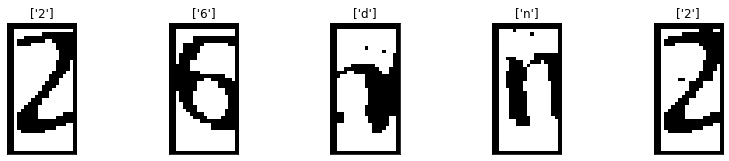

In [147]:
#visualisation of individual characters with labels
cnt=0
fig=plt.figure(figsize=(14,14))
for cnt,data in enumerate (all_images[0:5]):
    
    y=fig.add_subplot(5,5,cnt+1)
    img=data[0]
    data=img.reshape(1,38,20,1)
    model_out=model.predict([data])
    
    a=np.argmax(model_out)
      
        
    y.imshow(img,cmap='gray')
    plt.title(encoder.inverse_transform(model_out))
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
    

['3']['b']['n']['y']['f']


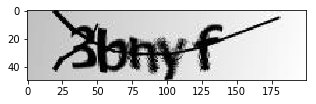

In [152]:
#prediction on final data

img=cv2.imread("D:\\captcha-version-2-images\\test\\3bnyf.png",cv2.IMREAD_GRAYSCALE)
th = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 17, 2)
fig=plt.figure(figsize=(5,5))
y=fig.add_subplot(1,1,1)
y.imshow(img,cmap='gray')
kernel = np.ones((1,3), np.uint8)
dilation = cv2.dilate(th, kernel, iterations=1)
erosion = cv2.erode(dilation, kernel, iterations=1)
kernel = np.ones((3,1), np.uint8)
img = cv2.dilate(erosion, kernel, iterations=1)
img=img/255
st=''

x, y, w, h = 30, 12, 20, 38
for  j in range(5):
    # get the bounding rect
    ch=i[j]
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        #cv2.rectangle(dilation, (x, y), (x + w, y + h), (0, 255, 0), 2)
        #cv2.rectangle(dilation2, (x, y), (x + w, y + h), (0, 255, 0), 2)
        #cv2.rectangle(dilation3, (x, y), (x + w, y + h), (0, 255, 0), 2)
    roi=img[y:y+h,x:x+w]
    data=roi.reshape(1,38,20,1)
    model_out=model.predict([data])
    a=np.argmax(model_out)
    print(encoder.inverse_transform(model_out),end='')
    x += w   

print(st)


['4']['y']['n']['f']['3']


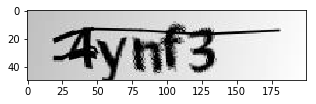

In [153]:
img=cv2.imread("D:\\captcha-version-2-images\\test\\4ynf3.png",cv2.IMREAD_GRAYSCALE)
th = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 17, 2)
fig=plt.figure(figsize=(5,5))
y=fig.add_subplot(1,1,1)
y.imshow(img,cmap='gray')
kernel = np.ones((1,3), np.uint8)
dilation = cv2.dilate(th, kernel, iterations=1)
erosion = cv2.erode(dilation, kernel, iterations=1)
kernel = np.ones((3,1), np.uint8)
img = cv2.dilate(erosion, kernel, iterations=1)
img=img/255
st=''

x, y, w, h = 30, 12, 20, 38
for  j in range(5):
    # get the bounding rect
    ch=i[j]
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        #cv2.rectangle(dilation, (x, y), (x + w, y + h), (0, 255, 0), 2)
        #cv2.rectangle(dilation2, (x, y), (x + w, y + h), (0, 255, 0), 2)
        #cv2.rectangle(dilation3, (x, y), (x + w, y + h), (0, 255, 0), 2)
    roi=img[y:y+h,x:x+w]
    data=roi.reshape(1,38,20,1)
    model_out=model.predict([data])
    a=np.argmax(model_out)
    print(encoder.inverse_transform(model_out),end='')
    x += w   

print(st)
